In [1]:
import pandas as pd
import numpy as np
from PIL import Image


In [2]:
padding_or_resize_df = pd.read_csv('cleaned_training_json_size_square.csv')
padding_or_resize_df

,path,min_r,min_c,max_r,max_c,r_len,c_len,category,box_area,c_by_r,r_by_c
0,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,1057,1440,1158,1540,101,100,red blood cell,10100,0.990099,1.010000
1,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,868,1303,971,1403,103,100,red blood cell,10300,0.970874,1.030000
2,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,578,900,689,1008,111,108,red blood cell,11988,0.972973,1.027778
3,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,304,611,408,713,104,102,red blood cell,10608,0.980769,1.019608
4,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,198,881,312,1003,114,122,red blood cell,13908,1.070175,0.934426
...,...,...,...,...,...,...,...,...,...,...,...
70823,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,194,771,296,895,102,124,red blood cell,12648,1.215686,0.822581
70824,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,1026,929,1130,1036,104,107,red blood cell,11128,1.028846,0.971963
70825,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,308,808,406,900,98,92,trophozoite,9016,0.938776,1.065217
70826,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,0,1260,87,1344,87,84,red blood cell,7308,0.965517,1.035714


In [3]:
padding_or_resize_df['c_min_r'] = padding_or_resize_df['c_len']-padding_or_resize_df['r_len']
padding_or_resize_df['r_min_c'] = padding_or_resize_df['r_len']-padding_or_resize_df['c_len']

padding_or_resize_df.head()

,path,min_r,min_c,max_r,max_c,r_len,c_len,category,box_area,c_by_r,r_by_c,c_min_r,r_min_c
0,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,1057,1440,1158,1540,101,100,red blood cell,10100,0.990099,1.010000,-1,1
1,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,868,1303,971,1403,103,100,red blood cell,10300,0.970874,1.030000,-3,3
2,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,578,900,689,1008,111,108,red blood cell,11988,0.972973,1.027778,-3,3
3,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,304,611,408,713,104,102,red blood cell,10608,0.980769,1.019608,-2,2
4,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,198,881,312,1003,114,122,red blood cell,13908,1.070175,0.934426,8,-8


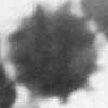

In [4]:
index = 0
x1 = padding_or_resize_df['min_r'][index]
x2 = padding_or_resize_df['max_r'][index]
y1 = padding_or_resize_df['min_c'][index]
y2 = padding_or_resize_df['max_c'][index]
image = np.array(Image.open(f'../malaria_data{padding_or_resize_df["path"][index]}'))
grayscale_image = Image.fromarray(image).convert('L')
grayscale_array = np.array(grayscale_image)
bounding_box = grayscale_array[ x1 : x2 , y1 : y2 ]
bounding_box_reshape = Image.fromarray(bounding_box).resize((108,108), resample=0)
bounding_box_reshape

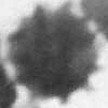

In [5]:
Image.fromarray(grayscale_array[1057:1158, 1440:1540]).resize((108,108))

In [6]:
padding_or_resize_df.shape[0]

70828

In [7]:
padding_or_resize_df.head(-1).shape

(70827, 13)

In [9]:
def return_resized_cell_array(iter_df, n_cells=0):
# enter the name of the dataframe and the number of cells if not whole dataframe
# create two lists, which will become our X and ys
    spliced_cells = []
    spliced_cells_category = []
    #  if function has value that isn't zero bypass statement 
    if n_cells != 0:
        iter_df = iter_df.head(n_cells)
    #     for loop going row by row in dataset
    for index, row in iter_df.iterrows():
    #     rename the min and max r and cs
        x1 = iter_df['min_r'][index]
        x2 = iter_df['max_r'][index]
        y1 = iter_df['min_c'][index]
        y2 = iter_df['max_c'][index]
    #        create f string from path column to open each large image in np.array using Pillow image package 
        image = np.array(Image.open(f'../malaria_data{iter_df["path"][index]}'))
    #        convert np.array into grayscale using Pillow image package 
        grayscale_image = Image.fromarray(image).convert('L')
    #         convert grayscale image back into np.array
        grayscale_array = np.array(grayscale_image)
    #     splice the np.array using the 4 coordinates
        bounding_box = grayscale_array[ x1 : x2 , y1 : y2 ]
    #        resize the bounding box to universalise to 108 by 108
        bounding_box_resize = Image.fromarray(bounding_box).resize((108,108), resample=0)
    #        append to both lists 
        spliced_cells.append(np.array(bounding_box_resize))
        spliced_cells_category.append(iter_df['category'][index])
        
    return spliced_cells, spliced_cells_category

In [10]:
spliced_cells, spliced_cells_category = return_resized_cell_array(padding_or_resize_df, 100)